In [25]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

## Exercises 2.1

In [26]:
# Setting Parameters
A = 1
alpha = 0.35
beta = 0.442
delta = 0.6415
sigma = 3
nvec = np.array([1, 1, 0.2])
SS_tol = 1e-9
f_params = [nvec, A, alpha, delta]

In [27]:
#Defining methods
def get_r(K, L, alpha, delta, A):
    return A * alpha * ((L / K) ** (1 - alpha)) - delta
def get_w(K, L, alpha, A):
    return A * (1 - alpha) * ((K / L) ** alpha)
def get_K(b2, b3):
    return b2 + b3
def get_cons(b_s, b_s_1, n_s, r, w):
    return w * n_s + (1 + r) * b_s - b_s_1
def get_util(c, sigma = 3):
    return (c ** (1-sigma))/(1-sigma)
def get_MU(c, sigma = 3):
    return c ** (-sigma)
def get_Y(K, L, alpha, A):
    return A * (K ** alpha) * (L ** (1-alpha))

In [28]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = b2 + b3
    L = nvec.sum()
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r, w)
    c2 = get_cons(b2, b3, nvec[1], r, w)
    c3 = get_cons(b3, 0, nvec[2], r, w)
    b_cnstr = np.zeros(2, dtype = 'bool')
    c_cnstr = np.zeros(3, dtype = 'bool')
    K_cnstr = ((b2 + b3)<=0)
    c_cnstr[0] = (c1<=0)
    c_cnstr[1] = (c2<=0)
    c_cnstr[2] = (c3<=0)
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
    return b_cnstr, c_cnstr, K_cnstr

### (a)

In [29]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(K_cnstr)

[ True False]
[ True False False]
False


The results above suggest that the nonnegativity constraint of consumption in period 1 is violated if the initial guess is [1.0, 1.2].

### (b)

In [30]:
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(K_cnstr)

[False False]
[False False False]
False


The results above suggest no constrain is violated if the initial guess is [0.06, -0.001].

### (c)

In [31]:
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr)
print(c_cnstr)
print(K_cnstr)

[False False]
[False False False]
False


The results above suggest no constrain is violated if the initial guess saving is [0.1, 0.1].

## Exercises 2.2

In [32]:
#Defining methods
def EulEqs(bvec, f_params):
    nvec, A, alpha, delta, beta = f_params
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r, w)
    c2 = get_cons(b2, b3, nvec[1], r, w)
    c3 = get_cons(b3, 0, nvec[2], r, w)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r) * MU2
    Eul2 = MU2 - beta*(1+r) * MU3
    Euler_eqs = np.array([Eul1, Eul2])
    return Euler_eqs


In [33]:
def get_SS(params, bvec_guess, SS_graphs = False):
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    f_params = np.array([nvec, A, alpha, delta, beta])
    b_ss = opt.root(EulEqs, bvec_guess, args = (f_params)).x
    b2, b3 = b_ss
    K_ss = get_K(b2, b3)
    r_ss = get_r(K_ss, L, alpha, delta, A)
    Y_ss = get_Y(K_ss, L, alpha, A)
    w_ss = get_w(K_ss, L, alpha, A)
    c1 = get_cons(0, b2, nvec[0], r_ss, w_ss)
    c2 = get_cons(b2, b3, nvec[1], r_ss, w_ss)
    c3 = get_cons(b3, 0, nvec[2], r_ss, w_ss)
    c_ss = np.array([c1, c2, c3])
    C_ss = c_ss.sum()
    EulErr_ss = EulEqs(b_ss, f_params)
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    if SS_graphs:
        fig, ax = plt.subplots()
        ax.plot(np.arange(1,4), c_ss, marker = 'o', label = 'consumptions in equilibrium')
        ax.plot(np.arange(2,4), b_ss, marker = 'o', label = 'savings in equilibrium')
        ax.legend()
        ax.grid()
        ax.set_title('Consumptions and Savings in Equilibrium')
        plt.show()
    return ss_output

### (a)

In [34]:
params = [beta, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
bvec_guess = np.array([0.1, 0.1])
ss_output = get_SS(params, bvec_guess)

In [35]:
print('The steady-state equilibrium values for savings are',ss_output['b_ss'])
print('The steady-state equilibrium values for consumptions are',ss_output['c_ss'])
print('The steady-state equilibrium value for wage is',ss_output['w_ss'])
print('The steady-state equilibrium value for interest rate is',ss_output['r_ss'])
print('The steady-state equilibrium value for capital is',ss_output['K_ss'])
print('The steady-state equilibrium value for output is',ss_output['Y_ss'])
print('The steady-state equilibrium value for total consumption is',ss_output['C_ss'])
print('The steady-state equilibrium values for Euler errors are',ss_output['EulErr_ss'])
print('The steady-state equilibrium value for resource constraint error is',ss_output['RCerr_ss'])
print()
print('The time to compute steady-state equilibrium is', ss_output['ss_time'], 'seconds')

The steady-state equilibrium values for savings are [0.01931253 0.0584111 ]
The steady-state equilibrium values for consumptions are [0.18241213 0.20961468 0.24087387]
The steady-state equilibrium value for wage is 0.20172465739052575
The steady-state equilibrium value for interest rate is 2.433062339127069
The steady-state equilibrium value for capital is 0.07772362575316386
The steady-state equilibrium value for output is 0.6827603788602411
The steady-state equilibrium value for total consumption is 0.6329006729395864
The steady-state equilibrium values for Euler errors are [-1.39266376e-12  2.62900812e-12]
The steady-state equilibrium value for resource constraint error is 8.326672684688674e-17

The time to compute steady-state equilibrium is 0.0012340000000001794 seconds


### (b)

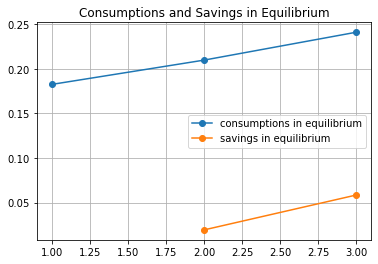

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0009160000000001389}

In [36]:
get_SS(params, bvec_guess, True)

### (c)

In [37]:
params2 = [0.55, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
ss_output2 = get_SS(params2, bvec_guess)
print('The steady-state equilibrium values for savings are',ss_output2['b_ss'], 'compared with previous', ss_output['b_ss'])
print('The steady-state equilibrium values for consumptions are',ss_output2['c_ss'], 'compared with previous', ss_output['c_ss'])
print('The steady-state equilibrium value for wage is',ss_output2['w_ss'], 'compared with previous', ss_output['w_ss'])
print('The steady-state equilibrium value for interest rate is',ss_output2['r_ss'], 'compared with previous', ss_output['r_ss'])

The steady-state equilibrium values for savings are [0.02817692 0.07686545] compared with previous [0.01931253 0.0584111 ]
The steady-state equilibrium values for consumptions are [0.19597528 0.22861594 0.26669307] compared with previous [0.18241213 0.20961468 0.24087387]
The steady-state equilibrium value for wage is 0.22415219593446706 compared with previous 0.20172465739052575
The steady-state equilibrium value for interest rate is 1.8863765057189819 compared with previous 2.433062339127069


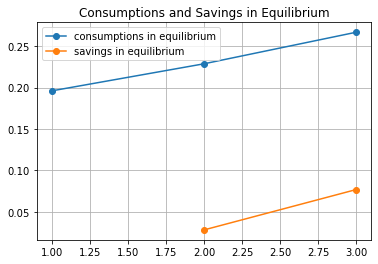

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0010729999999998796}

In [38]:
get_SS(params2, bvec_guess, True)

The results above suggest that in new steady-state, wage, saving and consumption in each period is higher than before, while the interest rate is lower than before.

The intuition is that as $\beta$ is larger, people value the future more and thus save more at the same interest. When the savings increase, the interest rate decreases; the capital used by firm increases; the marginal productivity of labor is higher and thus the wages is higher. This will lead to more consumption.

## Exercises 2.3

### (a)

In [39]:
#Defining method
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path
def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2, b3)
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs
def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat
def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "       difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

In [40]:
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 25
m = 25
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()
path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

In [41]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)

iteration:  1        difference:  0.0026923268543442304
iteration:  2        difference:  0.002157561740107384
iteration:  3        difference:  0.0017408174700849325
iteration:  4        difference:  0.0014142121894262733
iteration:  5        difference:  0.0011567365684827385
iteration:  6        difference:  0.0009525098783005804
iteration:  7        difference:  0.0007894893845593562
iteration:  8        difference:  0.0006585123205853974
iteration:  9        difference:  0.0005525827671266743
iteration:  10        difference:  0.0004663394689037951
iteration:  11        difference:  0.00039565771612220233
iteration:  12        difference:  0.0003373508229514696
iteration:  13        difference:  0.00028894577394323863
iteration:  14        difference:  0.00024851422573664284
iteration:  15        difference:  0.00021454491036903037
iteration:  16        difference:  0.00018584706684335225
iteration:  17        difference:  0.00016147717292832388
iteration:  18        difference:  

In [42]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = EulErr(b_path[i, :], w_path[i,1], w_path[i+1,1], w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], beta, alpha, delta, sigma, A, nvec)

In [43]:
print('Maximum of the absolute values of all the Euler errors across the entire time path is', np.abs(Eulerr_path).max())
print('Maximum of the absolute values of all the resource constraint errors across the entire time path is', np.abs(RCerr_path).max())

Maximum of the absolute values of all the Euler errors across the entire time path is 37.40392775466482
Maximum of the absolute values of all the resource constraint errors across the entire time path is 0.0057734276923919435


### (b)

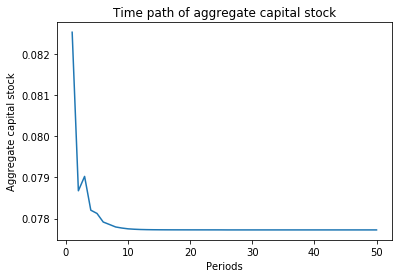

In [44]:
#plot k
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Aggregate capital stock')
plt.title('Time path of aggregate capital stock')
plt.show()

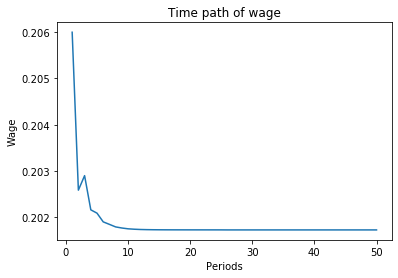

In [45]:
#plot wage
w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Wage')
plt.title('Time path of wage')
plt.show()

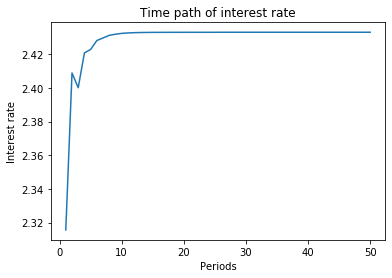

In [46]:
#plot interest rate
r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('Periods')
plt.ylabel('Interest rate')
plt.title('Time path of interest rate')
plt.show()

### (c)

In [47]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('It takes {} periods to get within 0.00001 of the steady-state aggregate capital stock.'.format(int(K_path[i, 0])))
        break

It takes 13 periods to get within 0.00001 of the steady-state aggregate capital stock.


In [48]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("After period {}, the aggregate capital stock never is again farther than 0.00001 away from the steady-state.".format(int(K_path[i, 0])))
        break

After period 13, the aggregate capital stock never is again farther than 0.00001 away from the steady-state.
